In [ ]:
  !pip install hmmlearn
from hmmlearn import hmm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.2/217.2 kB 2.1 MB/s eta 0:00:00


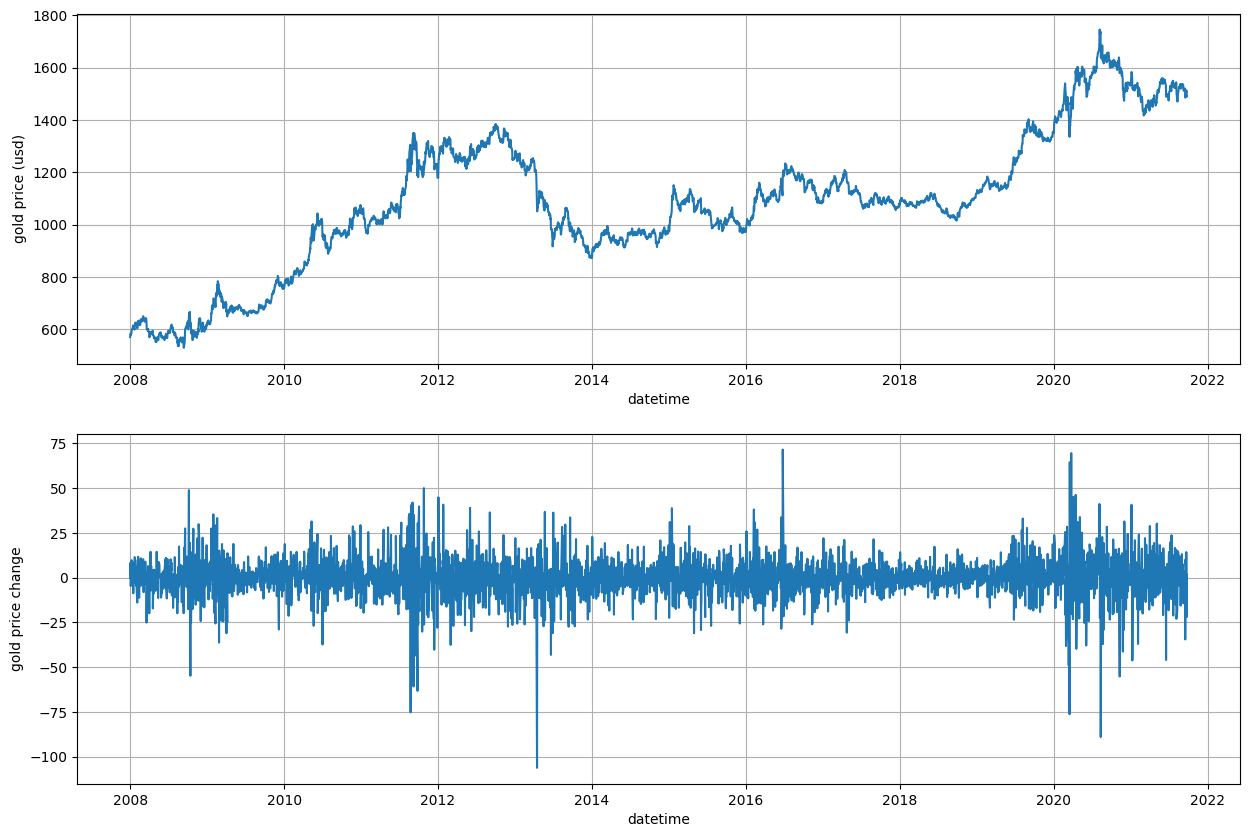

In [ ]:
base_dir=pd.read_csv("gold_price_usd.csv")

data=pd.read_csv(base_dir)

#convert the datetime from str to datetime object
data["datetime"]=pd.to_datetime(data["datetime"])

#determine the daily change in gold price
data["gold_price_change"]=data["gold_price_usd"].diff()


#restrict the data to later than 2008 Jan 01
data=data[data["datetime"]>=pd.to_datetime("2008-01-01")]

#Plot the daily gold prices As well the daily change
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(data["datetime"],data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"],data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change")
plt.grid(True)
plt.show()



covariance_type="diag"-for each hidden state the covariance matrix for each multivariate Gaussian distribution in the mixture is diagonal, and these matrices may be different.



we model the daily change in gold price-allows us to cpature the stae of the market.We fit we fit the daily change in gold prices to a gausiian emission model with threee hidden states.The reason for using 3 hidden states is that we expect -low,medium,high volatility

In [ ]:
X=data[["gold_price_change"]].values

model=hmm.GaussianHMM(n_components=3,covariance_type="diag",n_iter=50,random_state=42)

model.fit(X)
Z=model.predict(X)
states=pd.unique(Z)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


this HMMmodel will return 3 unique hidden states, these numbers donot have any intrinsic meaning-which state corresponds to which volatilty regime must be confiremd by looking at model parameters

In [ ]:
print(" unique states are")
print(states)

 unique states are
[1 0 2]


In [ ]:
print("\n start probabilites")
print(model.startprob_)


 start probabilites
[9.00876474e-03 9.90991235e-01 1.90652535e-52]


we will print the transistion matrix for the three hiddne states and we will show the diagonal elements are larger compared to off diagonal elements-the probabilty of transistions up or down is not high

In [ ]:
print("\n transistion matrix")
print(model.transmat_)


 transistion matrix
[[4.71987506e-02 9.52205396e-01 5.95853639e-04]
 [8.12868067e-01 1.35345228e-01 5.17867054e-02]
 [3.95757463e-02 4.27802116e-02 9.17644042e-01]]


In [ ]:
print("\n Gaussian distribution means")
print(model.means_)


 Gaussian distribution means
[[0.27897404]
 [0.20658205]
 [0.30620104]]


In [ ]:
print("\n Gaussian distribution covariances")
print(model.covars_)


 Gaussian distribution covariances
[[[ 28.11246244]]

 [[ 77.18151421]]

 [[324.43713708]]]


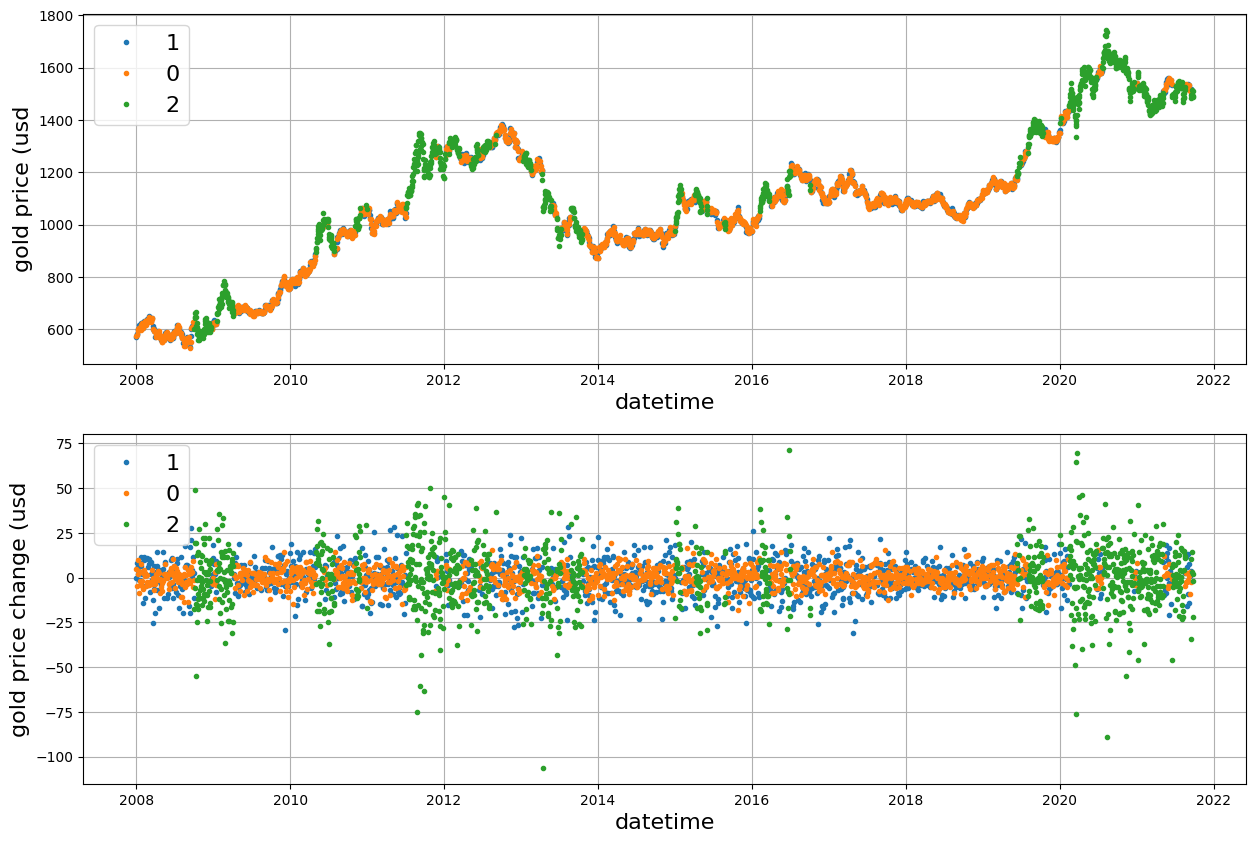

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
for i in states:
  want=(Z==i)
  x=data["datetime"].iloc[want]
  y=data["gold_price_usd"].iloc[want]
  plt.plot(x,y,'.')
plt.legend(states,fontsize=16)
plt.grid(True)
plt.xlabel("datetime",fontsize=16)
plt.ylabel("gold price (usd",fontsize=16)
plt.subplot(2,1,2)
for i in states:
  want=(Z==i)
  x=data["datetime"].iloc[want]
  y=data["gold_price_change"].iloc[want]
  plt.plot(x,y,'.')
plt.legend(states,fontsize=16)
plt.grid(True)
plt.xlabel("datetime",fontsize=16)
plt.ylabel("gold price change (usd",fontsize=16)
plt.show()

from the graph above we find that periods of high volatilty correspond ti difficult economic times such as the Lehmann shock from 2008 to 2009 the recession of 2011-2012 and the covid pandemic induced recession in 2022. when the price of gold changes, the investors will purchase gold
becaz gold is seen as a safe andstable asset